<a href="https://colab.research.google.com/github/Joy-Onuoha21/Machine-Learning-Project/blob/main/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries for Analysis

In [ ]:
# Import Libraries for Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.preprocessing import StandardScaler
import time


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load dataset

In [ ]:
# Load dataset
dataset = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

# Print Data Information
dataset.shape
# group data samples by class
data = dataset.groupby("Class")
class_size = data.size()

#Print number of samples for each class
for name, size in class_size.items():
  print("Number of class {} sample is {}".format(name, size))
print("\n")

# For each class, print-out the statistical description of features
for name, feature in data:
    print('class: {}'.format(name))
    print(f'{feature.describe()}\n')

Number of class 0 sample is 284315
Number of class 1 sample is 492


class: 0
                Time             V1             V2             V3  \
count  284315.000000  284315.000000  284315.000000  284315.000000   
mean    94838.202258       0.008258      -0.006271       0.012171   
std     47484.015786       1.929814       1.636146       1.459429   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54230.000000      -0.917544      -0.599473      -0.884541   
50%     84711.000000       0.020023       0.064070       0.182158   
75%    139333.000000       1.316218       0.800446       1.028372   
max    172792.000000       2.454930      18.902453       9.382558   

                  V4             V5             V6             V7  \
count  284315.000000  284315.000000  284315.000000  284315.000000   
mean       -0.007860       0.005453       0.002419       0.009637   
std         1.399333       1.356952       1.329913       1.178812   
min        -5.683171    

Data Pre-Processing

In [ ]:
# Normalize dataset
amount_values = dataset['Amount'].values.reshape(-1, 1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the 'Amount' feature using the scaler
scaled_amount = scaler.fit_transform(amount_values)

# Replace the original 'Amount' column with the scaled values
dataset['Amount'] = scaled_amount

#Drop the 'Time' feature from the DataFrame
dataset = dataset.drop(columns=['Time'])
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


Exploratory Analysis

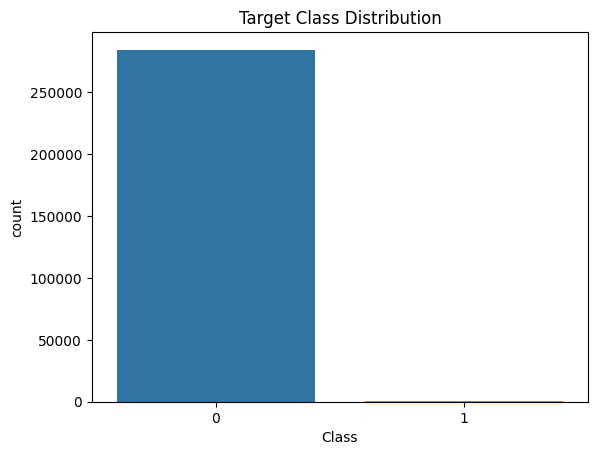

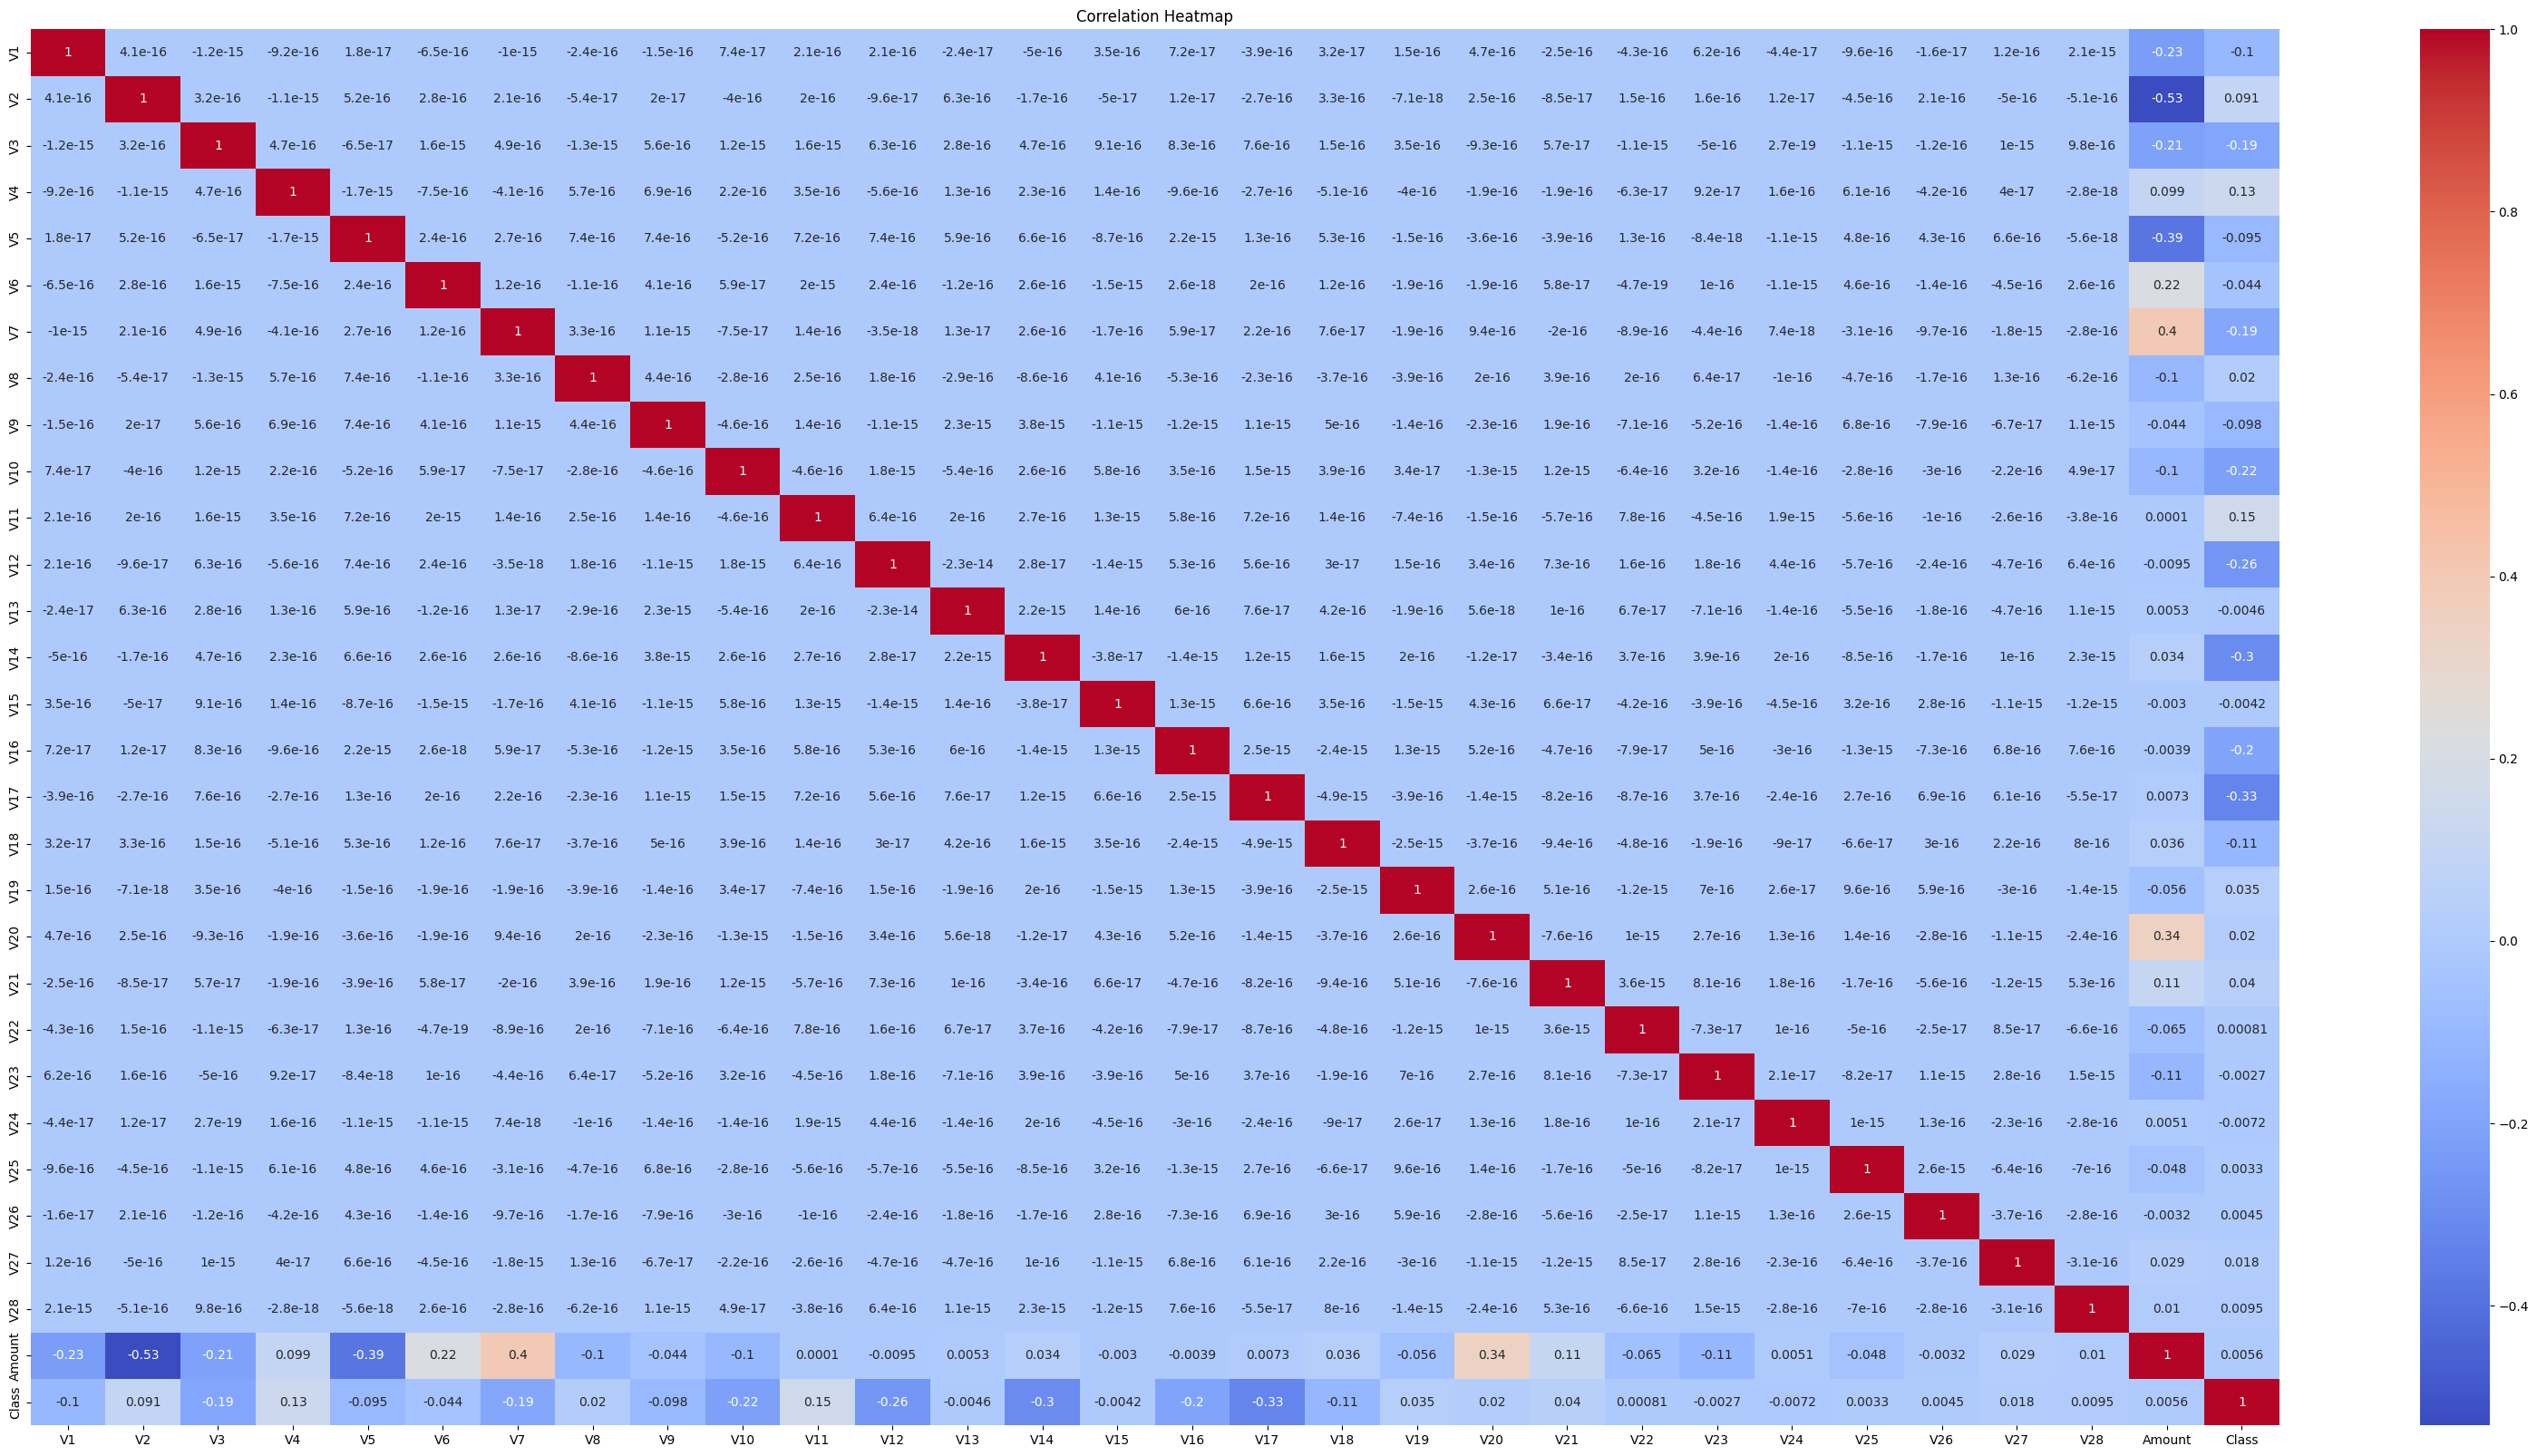

<ipython-input-5-ed3da90b0f09>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


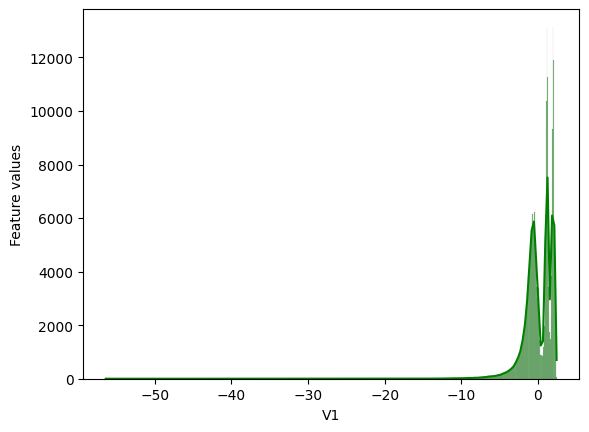

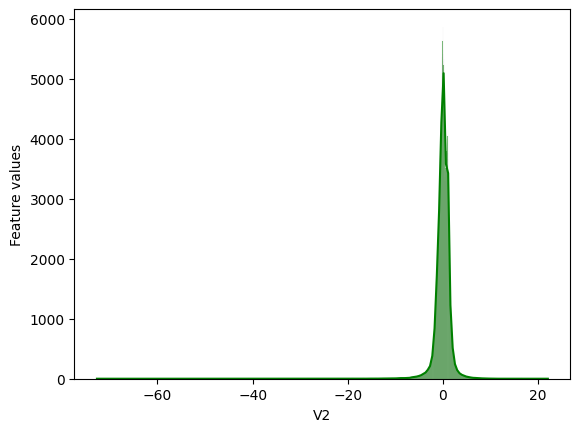

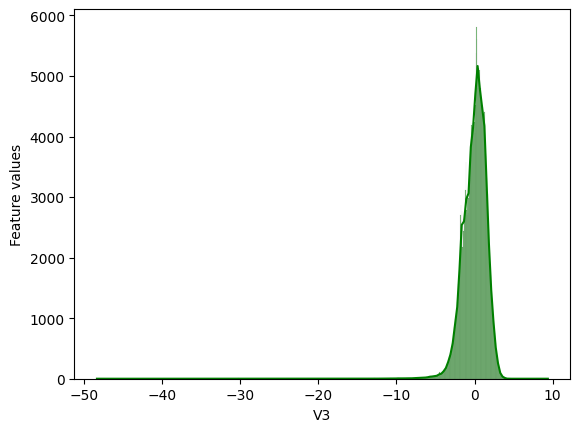

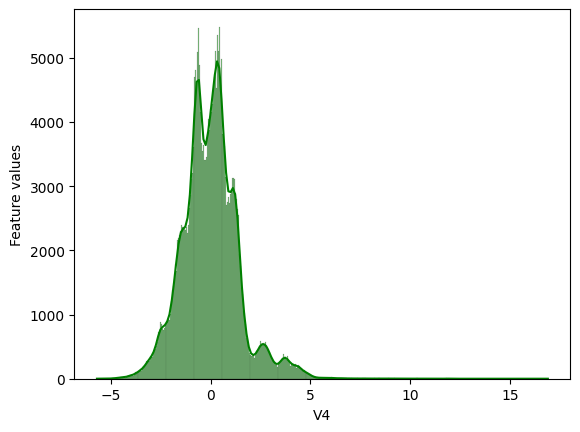

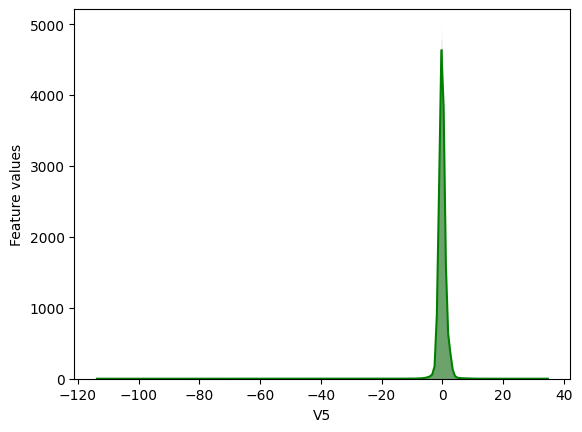

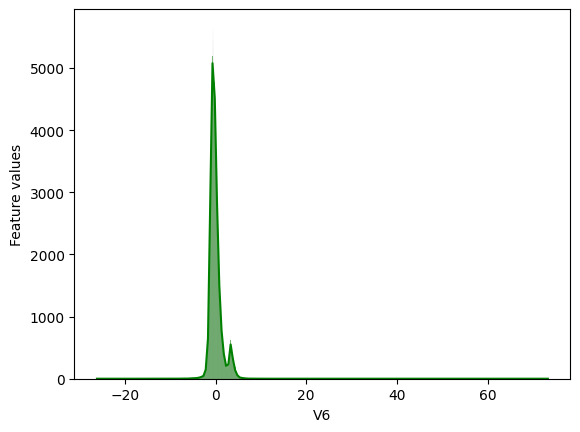

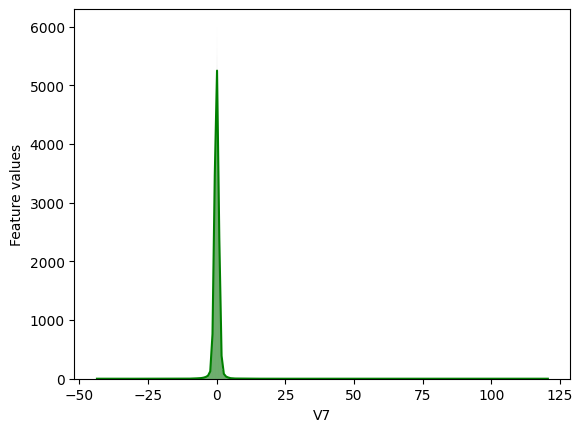

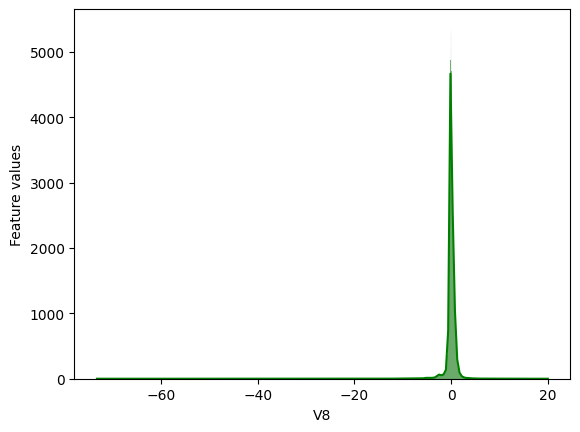

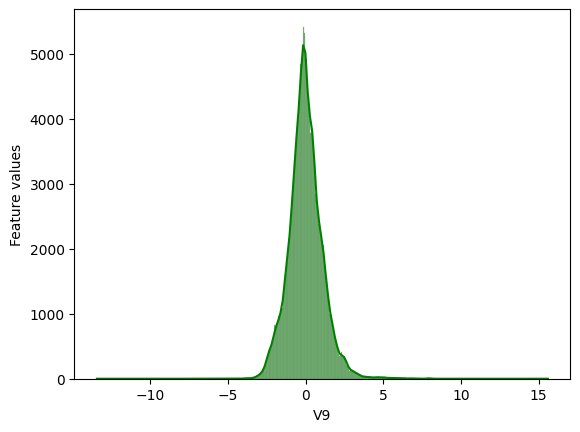

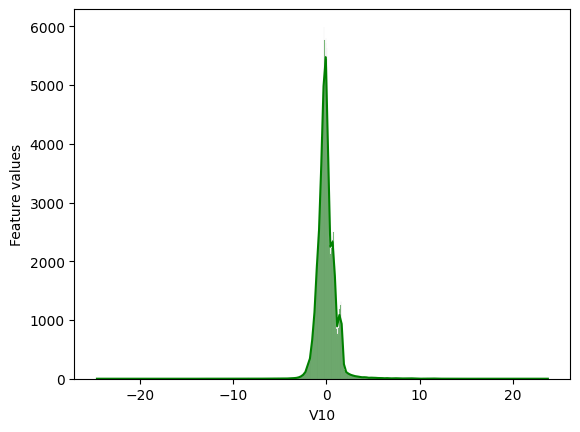

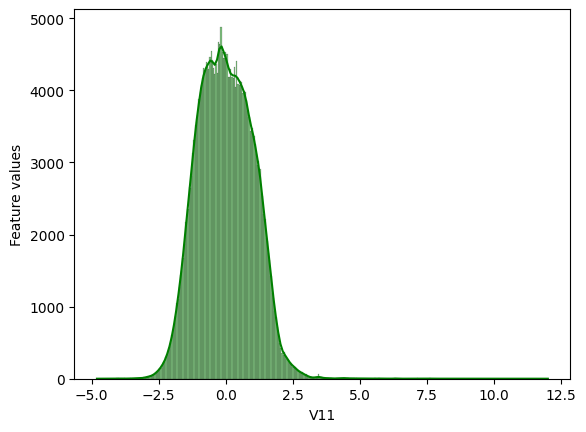

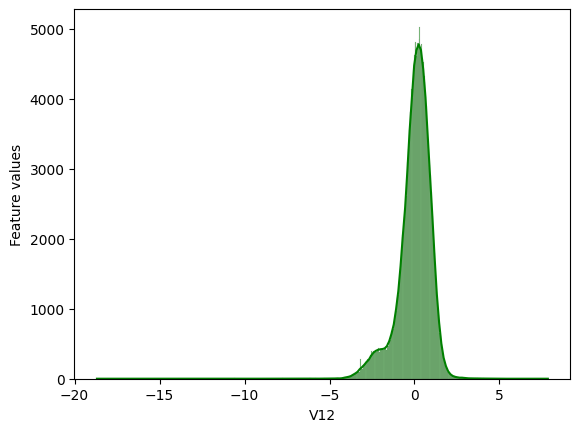

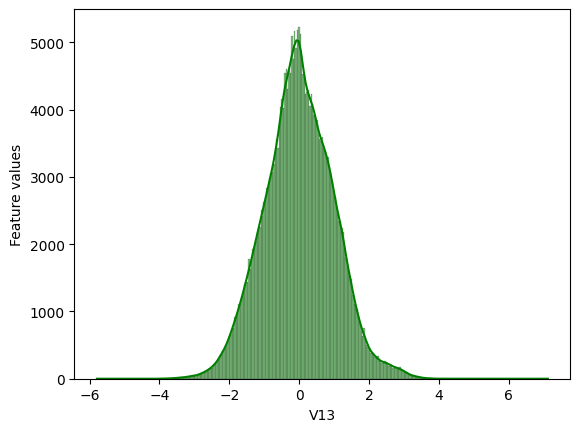

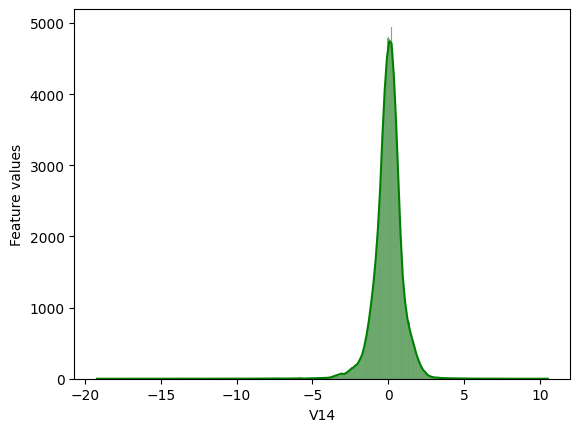

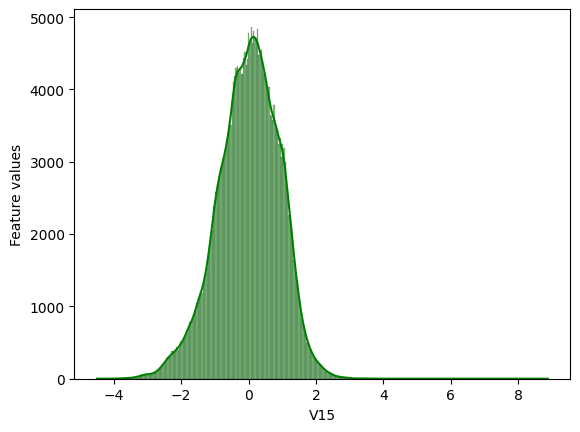

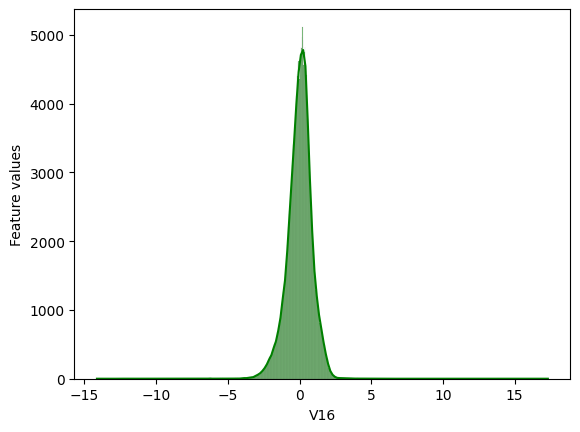

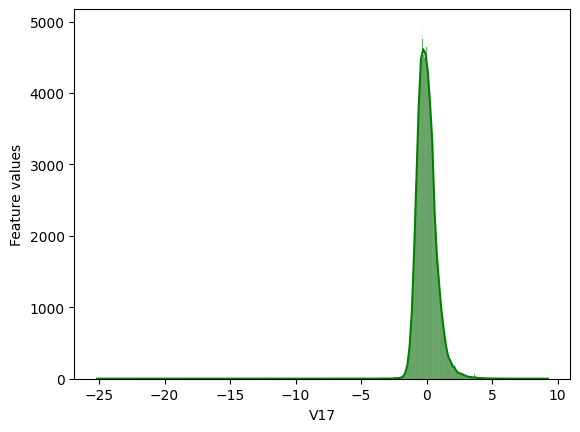

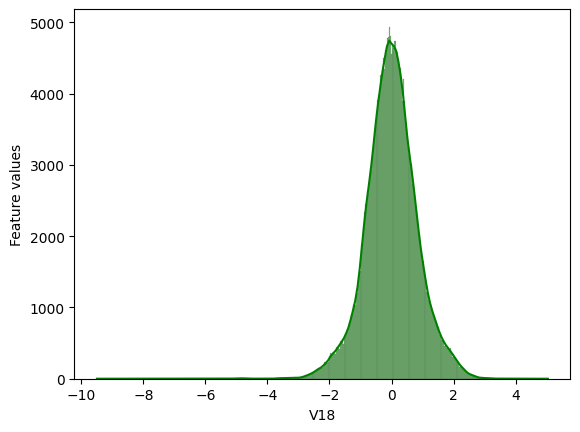

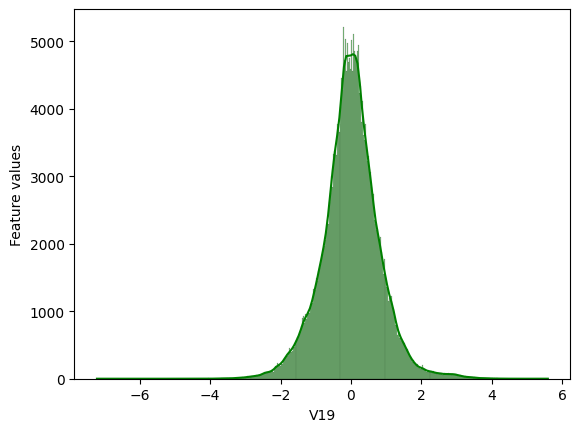

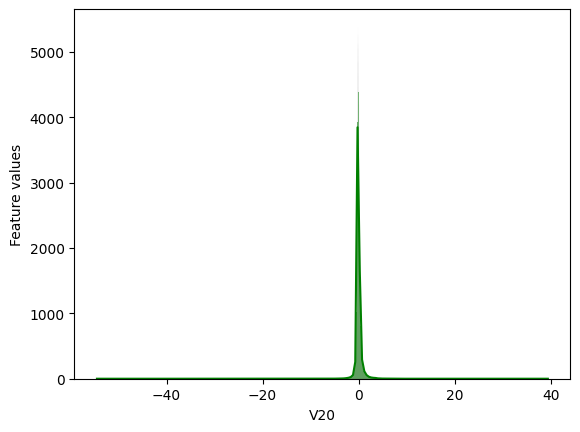

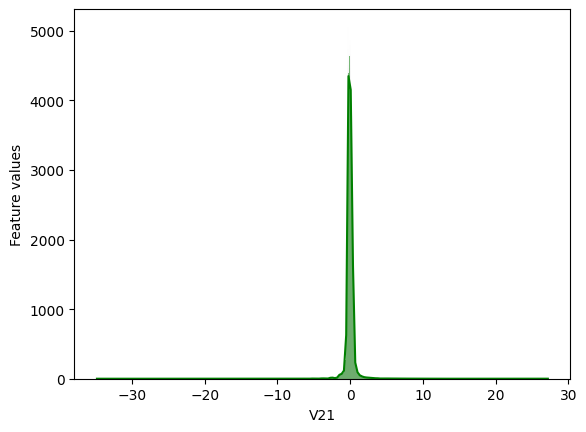

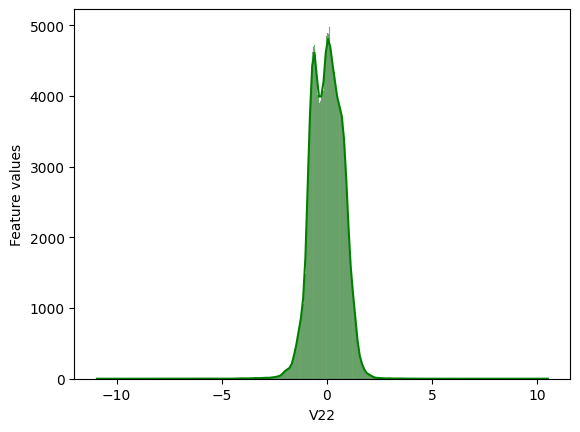

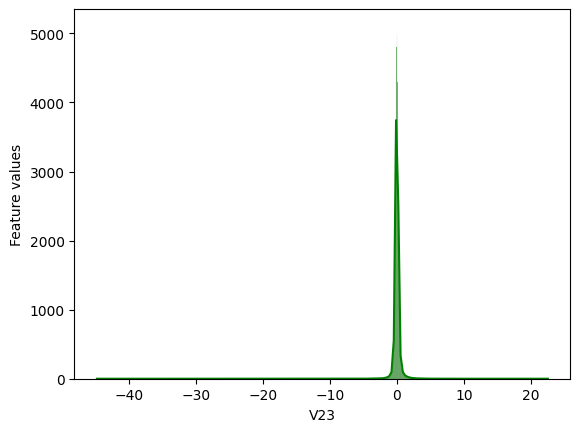

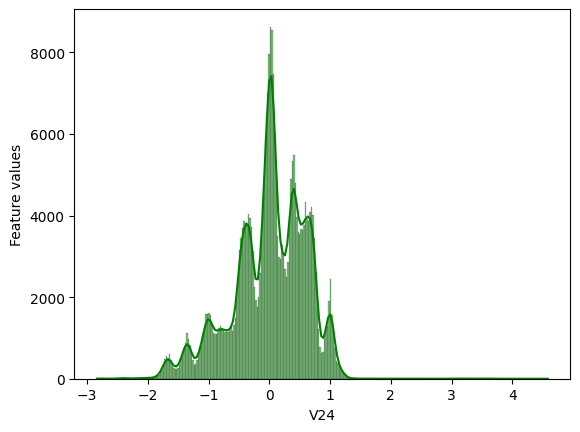

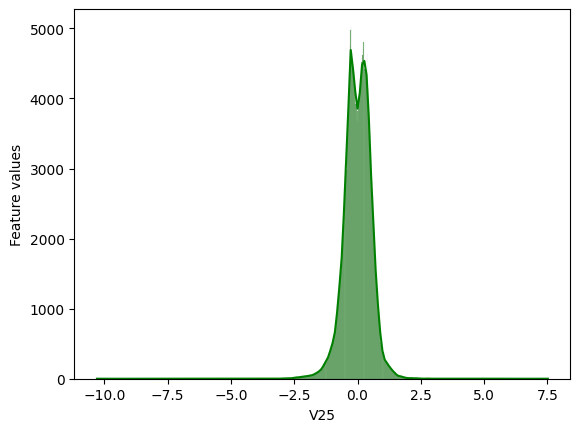

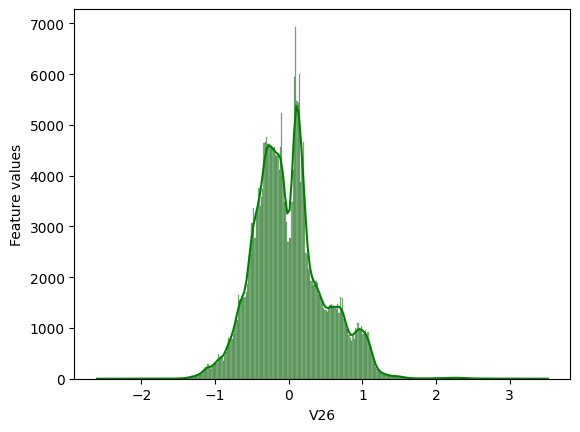

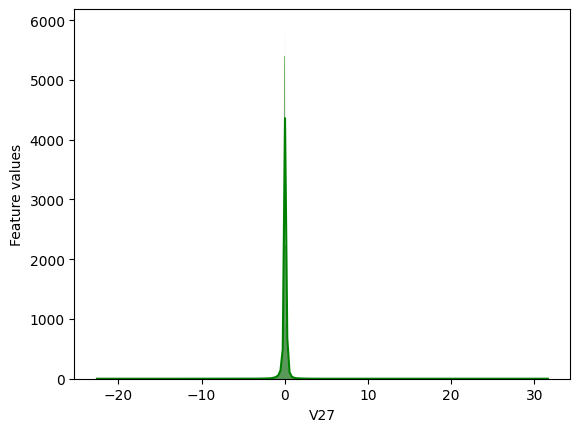

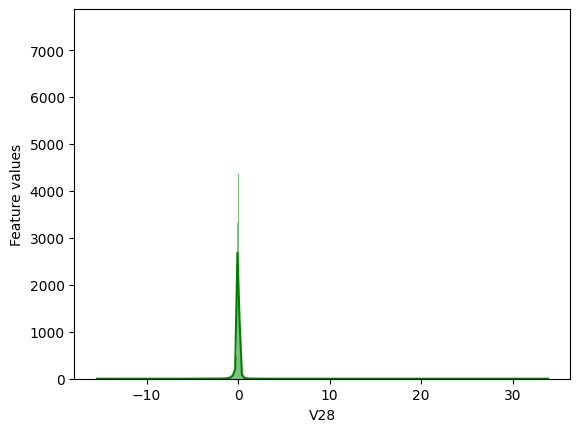

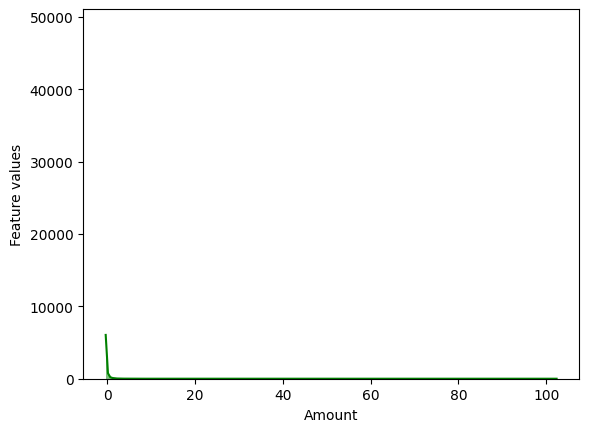

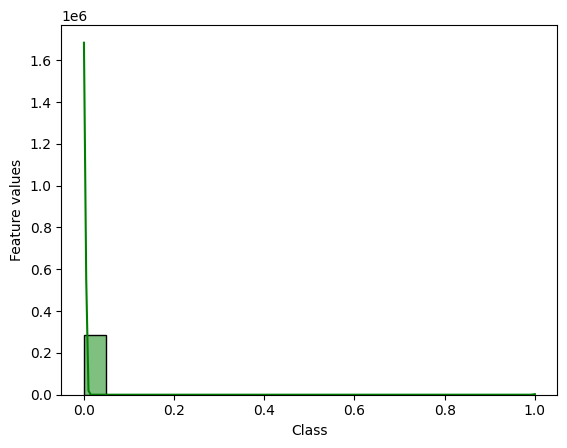

In [ ]:
# Visualize Data

# Separate fetures and class labels

label = dataset.iloc[:, -1]

features = dataset.iloc[:, :-1]

sns.countplot(x=label)
plt.title('Target Class Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(40, 20))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# plot histogram  and kde for each feature in  dataset
for feature in dataset.columns:
  plt.figure()
  plt.ylabel("Feature values")
  sns.histplot(dataset[feature], kde= True, color ='green')

Split Dataset

In [ ]:
# Split into train (80%) and test dataset(20%)

features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=42)


In [ ]:
# Print distribution of fraud and non-fraud samples in the training set
print("Training Set:")
print("Fraud samples:", sum(label_train == 1))
print("Non-Fraud samples:", sum(label_train == 0))
print()

# Print distribution of fraud and non-fraud samples in the testing set
print("Testing Set:")
print("Fraud samples:", sum(label_test == 1))
print("Non-Fraud samples:", sum(label_test == 0))

Training Set:
Fraud samples: 394
Non-Fraud samples: 227451

Testing Set:
Fraud samples: 98
Non-Fraud samples: 56864


KNN MODEL

In [ ]:

# Define a smaller range of k values for exploration
k_values = range(3, 10)

# Reduce the number of cross-validation folds
num_folds = 2

# Initialize empty lists to store the mean of each metric
roc_auc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Initialize dictionaries to store metrics for each k
roc_auc_dict = {}
precision_dict = {}
recall_dict = {}
f1_dict = {}

# Loop through each k value and perform cross-validation
for k in k_values:
    knnClassifier = KNeighborsClassifier(n_neighbors=k)
    roc_auc_cv = cross_val_score(knnClassifier, features_train, label_train, cv=num_folds, scoring='roc_auc')
    precision_cv = cross_val_score(knnClassifier, features_train, label_train, cv=num_folds, scoring='precision')
    recall_cv = cross_val_score(knnClassifier, features_train, label_train, cv=num_folds, scoring='recall')
    f1_cv = cross_val_score(knnClassifier, features_train, label_train, cv=num_folds, scoring='f1')

    roc_auc_scores.append(roc_auc_cv.mean())
    precision_scores.append(precision_cv.mean())
    recall_scores.append(recall_cv.mean())
    f1_scores.append(f1_cv.mean())

    # Store metrics for each k
    roc_auc_dict[k] = roc_auc_cv
    precision_dict[k] = precision_cv
    recall_dict[k] = recall_cv
    f1_dict[k] = f1_cv

# Find the index of the best k value based on each metric
best_roc_auc_k = k_values[roc_auc_scores.index(max(roc_auc_scores))]
best_precision_k = k_values[precision_scores.index(max(precision_scores))]
best_recall_k = k_values[recall_scores.index(max(recall_scores))]
best_f1_k = k_values[f1_scores.index(max(f1_scores))]

# Print the best k value based on each metric
print(f"Best k value for roc_auc: {best_roc_auc_k}")
print(f"Best k value for precision: {best_precision_k}")
print(f"Best k value for recall: {best_recall_k}")
print(f"Best k value for F1-Score: {best_f1_k}\n")


Best k value for roc_auc: 9
Best k value for precision: 4
Best k value for recall: 7
Best k value for F1-Score: 3



Evaluation metric for: manhattan metric with k=9
ROC AUC: 0.8723962221354495
Precision: 0.9240506329113924
Recall: 0.7448979591836735
F1 Score: 0.824858757062147


Execution time: 8077.50 seconds


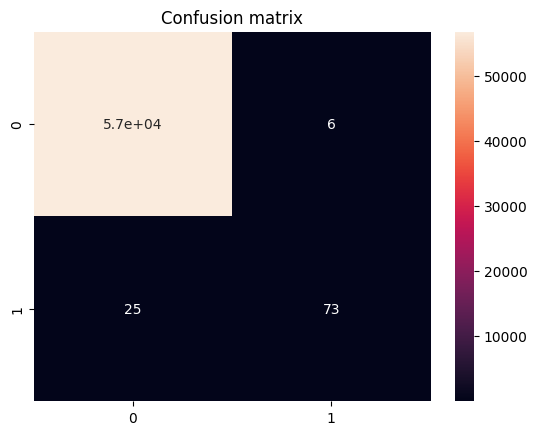

In [ ]:

# Record the start time
start_time = time.time()

# Define the range of parameter values for 'n_neighbors'
param_grid = {
    'n_neighbors': [3, 4, 7, 9],
    'metric': ['manhattan', 'euclidean']
}

# Create the KFold cross-validation object
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Create a KNeighborsClassifier
knnClassifier = KNeighborsClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(knnClassifier, param_grid, scoring='roc_auc', cv=kf, refit=True, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(features_train, label_train)

# Get the best parameter combination
best_params = grid_search.best_params_
best_k = best_params['n_neighbors']
best_metric = best_params['metric']

# Fit the best KNN model on the full training data
best_knnClassifier = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
best_knnClassifier.fit(features_train, label_train)

# Make predictions on the test data using the best model
y_pred = best_knnClassifier.predict(features_test)

# Calculate the evaluation metrics on the test data
roc_auc = roc_auc_score(label_test, y_pred)
precision = precision_score(label_test, y_pred)
recall = recall_score(label_test, y_pred)
f1 = f1_score(label_test, y_pred)

# Print evaluation metrics for the best model
print(f'Evaluation metric for: {best_metric} metric with k={best_k}')
print("ROC AUC:", roc_auc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n")

# Plot Confusion matrix
confus_matrix = confusion_matrix(label_test, y_pred)
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(confus_matrix, annot=True)


# Record the end time
end_time = time.time()

# Calculate and print the execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")


LOGISTIC REGRESSION

Evaluation metric for: l2 penalty with C=0.01
ROC AUC: 0.7754310678970519
Precision: 0.8571428571428571
Recall: 0.5510204081632653
F1 Score: 0.670807453416149


Execution time: 3983.63 seconds


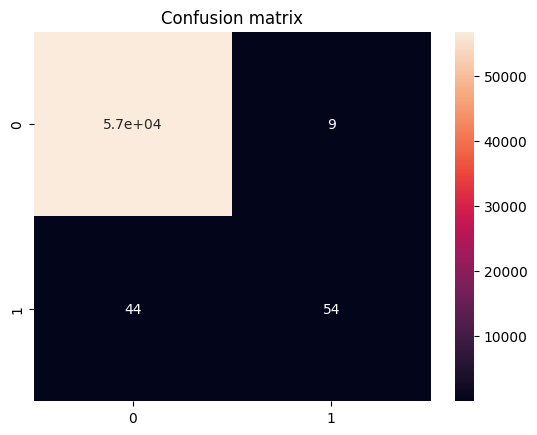

In [ ]:
# Record the start time
start_time = time.time()

# Create the KFold cross-validation object
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Define the range of parameter values for 'C' (inverse of regularization strength) and penalties
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Create GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(solver='saga', max_iter=1000),
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=kf,
                           refit=True,
                           n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(features_train, label_train)

# Get the best hyperparameters
best_C = grid_search.best_params_['C']
best_penalty = grid_search.best_params_['penalty']

# Define the Logistic Regression model with best parameters
best_logreg = LogisticRegression(C=best_C, penalty=best_penalty, solver="saga", max_iter=1000)
best_logreg.fit(features_train, label_train)

# Make predictions on the test data using the best model
y_pred = best_logreg.predict(features_test)

# Calculate the evaluation metrics on the test data
roc_auc = roc_auc_score(label_test, y_pred)
precision = precision_score(label_test, y_pred)
recall = recall_score(label_test, y_pred)
f1 = f1_score(label_test, y_pred)

# Print evaluation metrics for the best model
print(f'Evaluation metric for: {best_penalty} penalty with C={best_C}')
print("ROC AUC:", roc_auc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n")

# Plot Confusion matrix
confus_matrix = confusion_matrix(label_test, y_pred)
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(confus_matrix, annot=True)

# Record the end time
end_time = time.time()

# Calculate and print the execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")


DECISION TREE MODEL


Evaluation metric for: max_depth=10, min_samples_split=10
ROC AUC: 0.8825739250399091
Precision: 0.8928571428571429
Recall: 0.7653061224489796
F1 Score: 0.8241758241758241


Execution time: 382.92 seconds


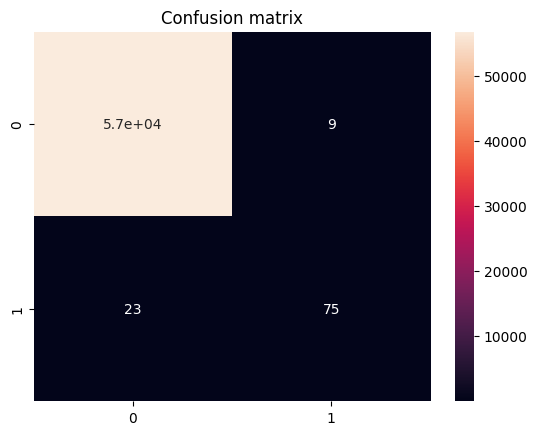

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Record the start time
start_time = time.time()

# Define the range of parameter values for 'max_depth' and 'min_samples_split'
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Create the KFold cross-validation object
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Create a DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(decision_tree, param_grid, scoring='roc_auc', cv=kf, refit=True, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(features_train, label_train)

# Get the best parameter combination
best_params = grid_search.best_params_
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']

# Fit the best Decision Tree model on the full training data
best_decision_tree = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split)
best_decision_tree.fit(features_train, label_train)

# Make predictions on the test data using the best model
y_pred = best_decision_tree.predict(features_test)

# Calculate the evaluation metrics on the test data
roc_auc = roc_auc_score(label_test, y_pred)
precision = precision_score(label_test, y_pred)
recall = recall_score(label_test, y_pred)
f1 = f1_score(label_test, y_pred)

# Print evaluation metrics for the best model
print(f'Evaluation metric for: max_depth={best_max_depth}, min_samples_split={best_min_samples_split}')
print("ROC AUC:", roc_auc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n")

# Plot Confusion matrix
confus_matrix = confusion_matrix(label_test, y_pred)
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(confus_matrix, annot=True)

# Record the end time
end_time = time.time()

# Calculate and print the execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")


Random Forest Model

Evaluation metric for: max_depth=15, min_samples_split=5
ROC AUC: 0.892839557038347
Precision: 0.9746835443037974
Recall: 0.7857142857142857
F1 Score: 0.8700564971751412


Execution time: 2762.33 seconds


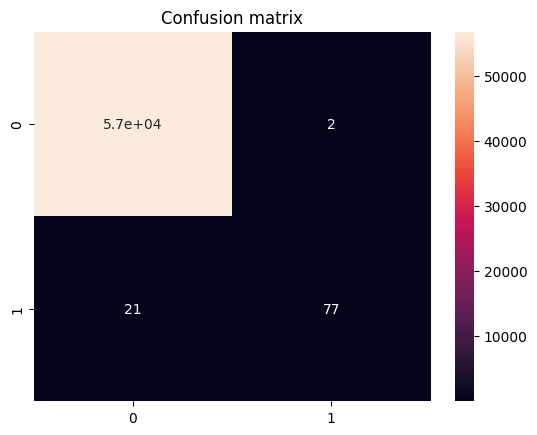

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Record the start time
start_time = time.time()

# Define the range of parameter values for RandomForestClassifier
param_grid = {
    'min_samples_split': [2, 5, 10],
    'max_depth': [None, 5, 10, 15]
}

# Create the KFold cross-validation object
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid=param_grid, scoring='roc_auc', cv=kf, refit=True, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(features_train, label_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_

# Fit the best Random Forest model on the full training data
best_rf_classifier.fit(features_train, label_train)

# Make predictions on the test data using the best model
y_pred = best_rf_classifier.predict(features_test)

# Calculate evaluation metrics
roc_auc = roc_auc_score(label_test, y_pred)
precision = precision_score(label_test, y_pred)
recall = recall_score(label_test, y_pred)
f1 = f1_score(label_test, y_pred)

# Print evaluation metrics for the best model
print(f'Evaluation metric for: max_depth={best_params["max_depth"]}, min_samples_split={best_params["min_samples_split"]}')
print("ROC AUC:", roc_auc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n")

# Plot Confusion matrix
confus_matrix = confusion_matrix(label_test, y_pred)
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(confus_matrix, annot=True)

# Record the end time
end_time = time.time()

# Calculate and print the execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")


SVM Model

Evaluation metrics for: C=0.1, kernel=linear, gamma=auto
ROC AUC: 0.8927076633973792
Precision: 0.8191489361702128
Recall: 0.7857142857142857
F1 Score: 0.8020833333333333


Execution time: 3323.07 seconds


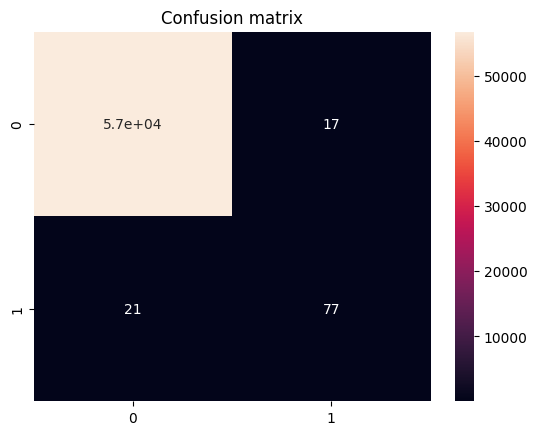

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Record the start time
start_time = time.time()

# Define the range of parameter values for SVM
param_grid = {
    'C': [0.1],
    'kernel': ['linear'],
    'gamma': ['auto']
}

# Create the KFold cross-validation object
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Create a Support Vector Classifier (SVC)
svm_classifier = SVC(probability=True, random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(svm_classifier, param_grid=param_grid, scoring='roc_auc', cv=kf, refit=True, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(features_train, label_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_svm_classifier = grid_search.best_estimator_

# Fit the best SVM model on the full training data
best_svm_classifier.fit(features_train, label_train)

# Make predictions on the test data using the best model
y_pred = best_svm_classifier.predict(features_test)

# Calculate evaluation metrics
roc_auc = roc_auc_score(label_test, y_pred)
precision = precision_score(label_test, y_pred)
recall = recall_score(label_test, y_pred)
f1 = f1_score(label_test, y_pred)

# Print evaluation metrics for the best model
print(f'Evaluation metrics for: C={best_params["C"]}, kernel={best_params["kernel"]}, gamma={best_params["gamma"]}')
print("ROC AUC:", roc_auc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n")

# Plot Confusion matrix
confus_matrix = confusion_matrix(label_test, y_pred)
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(confus_matrix, annot=True)

# Record the end time
end_time = time.time()

# Calculate and print the execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")


MLP

Evaluation metrics for the best MLP model:
ROC AUC: 0.8876671729468377
Precision: 0.8837209302325582
Recall: 0.7755102040816326
F1 Score: 0.826086956521739


Best Hyperparameters:
Hidden Layer Sizes: (50, 25)
Activation: logistic
Solver: adam


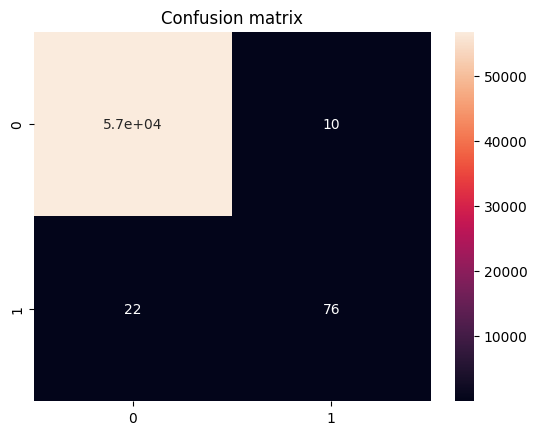

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(100, 50), (50, 25)],
    'activation': ['relu', 'logistic'],
    'solver': ['adam', 'sgd'],
}

# Create the MLP model
mlp_classifier = MLPClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(mlp_classifier, param_grid, scoring='roc_auc', cv=3, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(features_train, label_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_mlp_classifier = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_mlp_classifier.predict(features_test)

# Plot Confusion matrix
confus_matrix = confusion_matrix(label_test, y_pred)
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(confus_matrix, annot=True)

# Calculate evaluation metrics
roc_auc = roc_auc_score(label_test, y_pred)
precision = precision_score(label_test, y_pred)
recall = recall_score(label_test, y_pred)
f1 = f1_score(label_test, y_pred)

# Print evaluation metrics for the best model
print(f"Evaluation metrics for the best MLP model:")
print("ROC AUC:", roc_auc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n")

# Print best hyperparameters
print(f"Best Hyperparameters:")
print(f"Hidden Layer Sizes: {best_params['hidden_layer_sizes']}")
print(f"Activation: {best_params['activation']}")
print(f"Solver: {best_params['solver']}")


BALANCE DATASET

In [ ]:
pip install imbalanced-learn


In [ ]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

# Apply oversampling to balance the training data
oversampler = RandomOverSampler(random_state=42)
features_train_resampled, label_train_resampled = oversampler.fit_resample(features_train, label_train)



Training Set:
Fraud samples: 227451
Non-Fraud samples: 227451



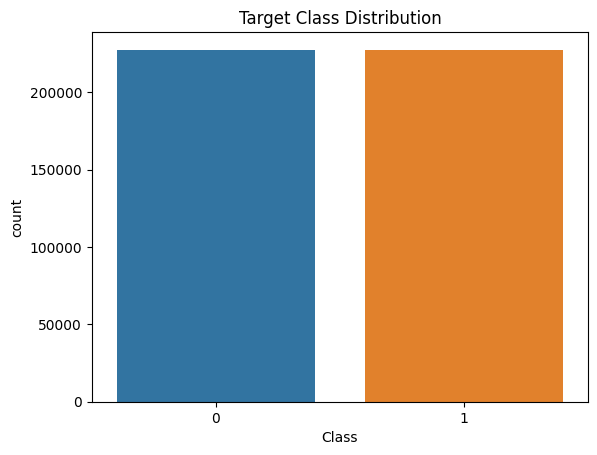

In [ ]:
# Print distribution of fraud and non-fraud samples in the training set
print("Training Set:")
print("Fraud samples:", sum(label_train_resampled == 1))
print("Non-Fraud samples:", sum(label_train_resampled == 0))
print()

sns.countplot(x=label_train_resampled)
plt.title('Target Class Distribution')
plt.show()

KNN MODEL

Evaluation metric for: manhattan metric with k=9
ROC AUC: 0.9382479356402098
Precision: 0.589041095890411
Recall: 0.8775510204081632
F1 Score: 0.7049180327868853


Execution time: 1972.78 seconds


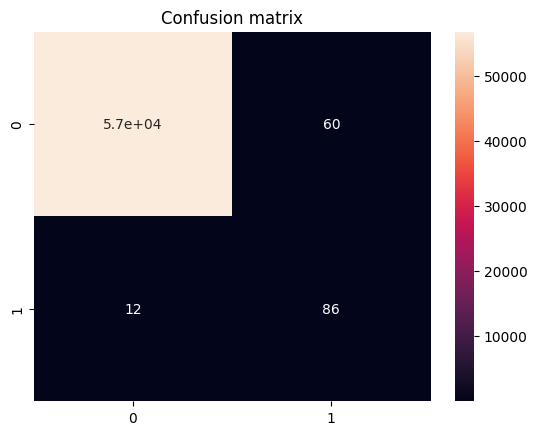

In [ ]:

# Record the start time
start_time = time.time()

# Define the range of parameter values for 'n_neighbors'
param_grid = {
    'n_neighbors': [9],
    'metric': ['manhattan']
}

# Create the KFold cross-validation object
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Create a KNeighborsClassifier
knnClassifier = KNeighborsClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(knnClassifier, param_grid, scoring='roc_auc', cv=kf, refit=True, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(features_train, label_train)

# Get the best parameter combination
best_params = grid_search.best_params_
best_k = best_params['n_neighbors']
best_metric = best_params['metric']

# Fit the best KNN model on the full training data
best_knnClassifier = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
best_knnClassifier.fit(features_train_resampled, label_train_resampled)

# Make predictions on the test data using the best model
y_pred = best_knnClassifier.predict(features_test)

# Calculate the evaluation metrics on the test data
roc_auc = roc_auc_score(label_test, y_pred)
precision = precision_score(label_test, y_pred)
recall = recall_score(label_test, y_pred)
f1 = f1_score(label_test, y_pred)

# Print evaluation metrics for the best model
print(f'Evaluation metric for: {best_metric} metric with k={best_k}')
print("ROC AUC:", roc_auc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n")

# Plot Confusion matrix
confus_matrix = confusion_matrix(label_test, y_pred)
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(confus_matrix, annot=True)


# Record the end time
end_time = time.time()

# Calculate and print the execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")


LOGISTIC REGRESSION MODEL

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Evaluation metric for: l2 penalty with C=100
ROC AUC: 0.9463460257485099
Precision: 0.05806451612903226
Recall: 0.9183673469387755
F1 Score: 0.1092233009708738


Execution time: 7072.48 seconds


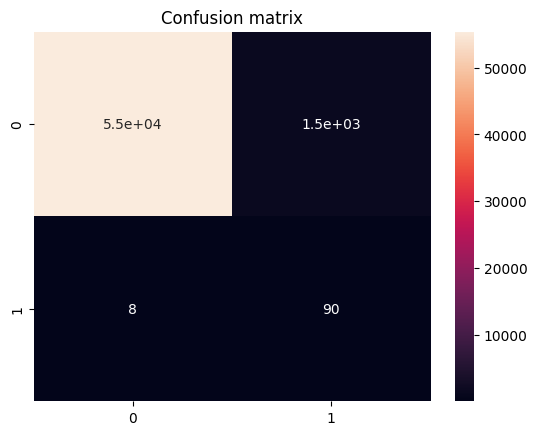

In [ ]:
# Record the start time
start_time = time.time()

# Create the KFold cross-validation object
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Define the range of parameter values for 'C' (inverse of regularization strength) and penalties
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Create GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(solver='saga', max_iter=1000), param_grid=param_grid, scoring='roc_auc', cv=kf, refit=True, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(features_train_resampled, label_train_resampled)

# Get the best hyperparameters
best_C = grid_search.best_params_['C']
best_penalty = grid_search.best_params_['penalty']

# Define the Logistic Regression model with best parameters
best_logreg = LogisticRegression(C=best_C, penalty=best_penalty, solver="saga", max_iter=1000)
best_logreg.fit(features_train_resampled, label_train_resampled)

# Make predictions on the test data using the best model
y_pred = best_logreg.predict(features_test)

# Calculate the evaluation metrics on the test data
roc_auc = roc_auc_score(label_test, y_pred)
precision = precision_score(label_test, y_pred)
recall = recall_score(label_test, y_pred)
f1 = f1_score(label_test, y_pred)

# Print evaluation metrics for the best model
print(f'Evaluation metric for: {best_penalty} penalty with C={best_C}')
print("ROC AUC:", roc_auc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n")

# Plot Confusion matrix
confus_matrix = confusion_matrix(label_test, y_pred)
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(confus_matrix, annot=True)

# Record the end time
end_time = time.time()

# Calculate and print the execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")


DECISION TREE

Evaluation metric for: max_depth=None, min_samples_split=5
ROC AUC: 0.8620426610430328
Precision: 0.7553191489361702
Recall: 0.7244897959183674
F1 Score: 0.7395833333333335


Execution time: 219.22 seconds


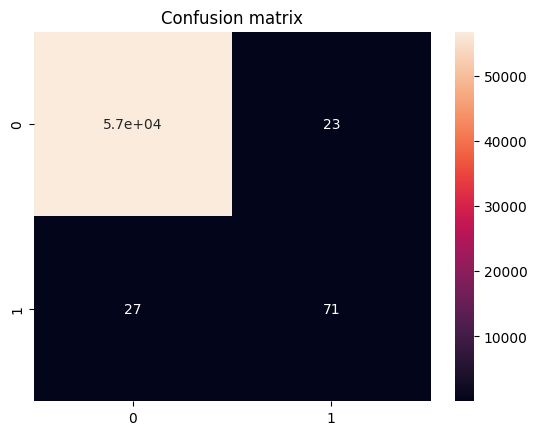

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Record the start time
start_time = time.time()

# Define the range of parameter values for 'max_depth' and 'min_samples_split'
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Create the KFold cross-validation object
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Create a DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(decision_tree, param_grid, scoring='roc_auc', cv=kf, refit=True, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(features_train_resampled, label_train_resampled)

# Get the best parameter combination
best_params = grid_search.best_params_
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']

# Fit the best Decision Tree model on the full training data
best_decision_tree = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split)
best_decision_tree.fit(features_train_resampled, label_train_resampled)

# Make predictions on the test data using the best model
y_pred = best_decision_tree.predict(features_test)

# Calculate the evaluation metrics on the test data
roc_auc = roc_auc_score(label_test, y_pred)
precision = precision_score(label_test, y_pred)
recall = recall_score(label_test, y_pred)
f1 = f1_score(label_test, y_pred)

# Print evaluation metrics for the best model
print(f'Evaluation metric for: max_depth={best_max_depth}, min_samples_split={best_min_samples_split}')
print("ROC AUC:", roc_auc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n")

# Plot Confusion matrix
confus_matrix = confusion_matrix(label_test, y_pred)
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(confus_matrix, annot=True)

# Record the end time
end_time = time.time()

# Calculate and print the execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")


Evaluation metric for: max_depth=None, min_samples_split=2
ROC AUC: 0.892839557038347
Precision: 0.9746835443037974
Recall: 0.7857142857142857
F1 Score: 0.8700564971751412


Execution time: 4214.50 seconds


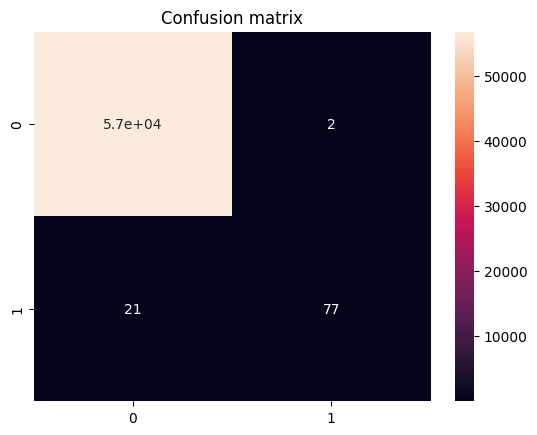

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Record the start time
start_time = time.time()

# Define the range of parameter values for RandomForestClassifier
param_grid = {
    'min_samples_split': [2, 5, 10],
    'max_depth': [None, 5, 10, 15]
}

# Create the KFold cross-validation object
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid=param_grid, scoring='roc_auc', cv=kf, refit=True, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(features_train_resampled, label_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_

# Fit the best Random Forest model on the full training data
best_rf_classifier.fit(features_train_resampled, label_train_resampled)

# Make predictions on the test data using the best model
y_pred = best_rf_classifier.predict(features_test)

# Calculate evaluation metrics
roc_auc = roc_auc_score(label_test, y_pred)
precision = precision_score(label_test, y_pred)
recall = recall_score(label_test, y_pred)
f1 = f1_score(label_test, y_pred)

# Print evaluation metrics for the best model
print(f'Evaluation metric for: max_depth={best_params["max_depth"]}, min_samples_split={best_params["min_samples_split"]}')
print("ROC AUC:", roc_auc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n")

# Plot Confusion matrix
confus_matrix = confusion_matrix(label_test, y_pred)
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(confus_matrix, annot=True)

# Record the end time
end_time = time.time()

# Calculate and print the execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")


In [ ]:
# Define the SMOTE
smote = over_sampling.SMOTE(random_state=0)
features_train_resampled, label_train_resampled = smote.fit_resample(features_train, label_train)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Record the start time
start_time = time.time()

# Define the range of parameter values for SVM
param_grid = {
    'C': [0.1],
    'kernel': ['linear']
}

# Create the KFold cross-validation object
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Create a Support Vector Classifier (SVC)
svm_classifier = SVC(probability=True, random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(svm_classifier, param_grid=param_grid, scoring='roc_auc', cv=kf, refit=True, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(features_train_resampled, label_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_svm_classifier = grid_search.best_estimator_

# Fit the best SVM model on the full training data
best_svm_classifier.fit(features_train_resampled, label_train_resampled)

# Make predictions on the test data using the best model
y_pred = best_svm_classifier.predict(features_test)

# Calculate evaluation metrics
roc_auc = roc_auc_score(label_test, y_pred)
precision = precision_score(label_test, y_pred)
recall = recall_score(label_test, y_pred)
f1 = f1_score(label_test, y_pred)

# Print evaluation metrics for the best model
print(f'Evaluation metrics for: C={best_params["C"]}, kernel={best_params["kernel"]}')
print("ROC AUC:", roc_auc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n")

# Plot Confusion matrix
confus_matrix = confusion_matrix(label_test, y_pred)
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(confus_matrix, annot=True)

# Record the end time
end_time = time.time()

# Calculate and print the execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")


Evaluation metrics for the best MLP model:
ROC AUC: 0.9079874071181652
Precision: 0.8
Recall: 0.8163265306122449
F1 Score: 0.8080808080808082


Best Hyperparameters:
Hidden Layer Sizes: (100, 50)
Activation: relu
Solver: adam


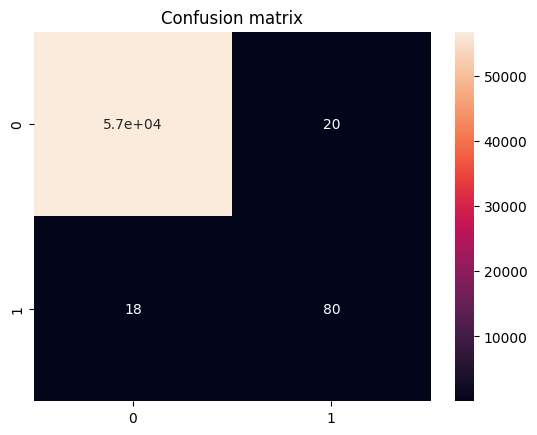

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(100, 50), (50, 25)],
    'activation': ['relu', 'logistic'],
    'solver': ['adam', 'sgd'],
}

# Create the MLP model
mlp_classifier = MLPClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(mlp_classifier, param_grid, scoring='roc_auc', cv=3, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(features_train_resampled, label_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_mlp_classifier = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_mlp_classifier.predict(features_test)

# Plot Confusion matrix
confus_matrix = confusion_matrix(label_test, y_pred)
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(confus_matrix, annot=True)

# Calculate evaluation metrics
roc_auc = roc_auc_score(label_test, y_pred)
precision = precision_score(label_test, y_pred)
recall = recall_score(label_test, y_pred)
f1 = f1_score(label_test, y_pred)

# Print evaluation metrics for the best model
print(f"Evaluation metrics for the best MLP model:")
print("ROC AUC:", roc_auc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n")

# Print best hyperparameters
print(f"Best Hyperparameters:")
print(f"Hidden Layer Sizes: {best_params['hidden_layer_sizes']}")
print(f"Activation: {best_params['activation']}")
print(f"Solver: {best_params['solver']}")
